In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from ..exp.dataset import AVLDataset, STRESS_QUEST

In [21]:
DATA_DIR = "/raid/decaro/datasets/raw/AVL/"
EXP_DIR = "/raid/decaro/experiments/avl/"

# Data Analysis

Importing the data.

In [22]:
trace = pd.read_csv(DATA_DIR + "merged/ecg_gsr_scenario_cleaned_v5.csv")
quest = pd.read_csv(DATA_DIR + "quest/raw.csv", sep=";")

In [23]:
user = AVLDataset.USERS[3]

In [24]:
trace[(trace["prob_id"] == user) & (trace["scenario_id"] == 1)].head(50)

,ts_corr_time_offset,prob_id,scenario_id,gsr_data,gsr_data_diff,ecg_data,ecg_data_diff,events
60156,00:00:00.000000,1004,1,2.162250,0.016417,6.851526,9.159539,normal
60157,00:00:00.500000,1004,1,2.174625,0.012375,5.753693,-1.097833,normal
60158,00:00:01.000000,1004,1,2.181875,0.007250,-14.351293,-20.104986,normal
60159,00:00:01.500000,1004,1,2.184625,0.002750,4.208693,18.559986,normal
60160,00:00:02.000000,1004,1,2.182500,-0.002125,-6.679661,-10.888354,normal
60161,00:00:02.500000,1004,1,2.180500,-0.002000,2.206488,8.886149,normal
60162,00:00:03.000000,1004,1,2.175000,-0.005500,-4.912567,-7.119055,normal
60163,00:00:03.500000,1004,1,2.172000,-0.003000,4.778626,9.691193,normal
60164,00:00:04.000000,1004,1,2.170375,-0.001625,0.396212,-4.382414,normal
60165,00:00:04.500000,1004,1,2.165750,-0.004625,-5.734237,-6.130449,normal


In [25]:
q_u = quest[(quest["prob_id"] == user)]
q_u = q_u[STRESS_QUEST] / 5
q_u

,S1M1Q8,S2M1Q8,S3M1Q8,S4M1Q8,S5M1Q8,S6M1Q8
4,0.0,0.782,0.068,0.026,0.218,0.0


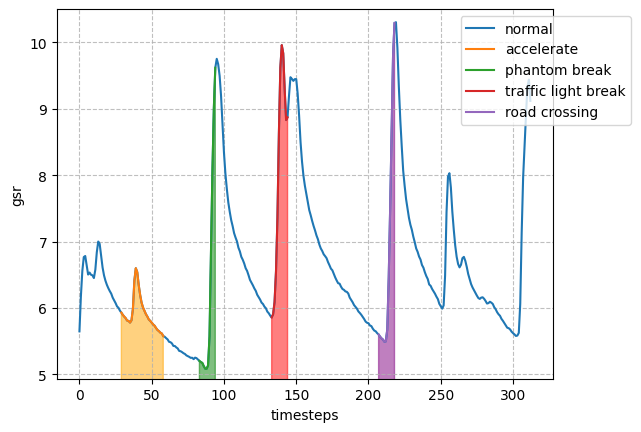

In [26]:
import numpy as np
user = AVLDataset.USERS[7]
curr_trace = trace[(trace["prob_id"] == user) & (trace["scenario_id"] == (6))].iloc[1:]
curr_trace["events"].iloc[29:59] = "acceleration"
curr_trace = curr_trace.reset_index()
curr_trace["events"] = curr_trace["events"].replace({
    "s6_ego_phantom_breaking": "phantom break",
    "s6_ego_sharp_breaking_at_the_traffic_light": "traffic light break",
    "s6_ego_road_crossing": "road crossing",
})

colors = {
    "acceleration": "orange",
    "phantom break": "red",
    "traffic light break": "green",
    "road crossing": "purple",
}

for event in curr_trace["events"].unique():
    if event == "normal":
        plt.plot(curr_trace.index, curr_trace["gsr_data"], label=event)
    else:
        event_trace = curr_trace[curr_trace["events"] == event]
        plt.plot(event_trace.index, event_trace["gsr_data"], label=event)

for event in curr_trace["events"].unique():
    if event == "normal":
        continue
    event_trace = curr_trace[curr_trace["events"] == event]
    plt.fill_between(
        event_trace.index,
        event_trace["gsr_data"],
        color=colors[event],
        alpha=0.5,
    )

plt.xlabel("timesteps")
plt.ylabel("gsr")
plt.ylim(curr_trace["gsr_data"].min() - 0.15, 10.5)
plt.legend(["normal", "accelerate", "phantom break", "traffic light break", "road crossing"], bbox_to_anchor=(0.8, 1), loc='upper left')
plt.grid(True, which="major", axis="both", linestyle="--", alpha=0.8)
plt.savefig(EXP_DIR + "gsr_events.png", bbox_inches="tight", dpi=400)
plt.show()


# Experiment Analysis

In [19]:
from exp.config import get_analysis, get_exp_dir

method = "dt"
exp_dir = get_exp_dir(method)
analysis = get_analysis("retraining", exp_dir, "max")

In [20]:
df = analysis.dataframe()
df = df.sort_values(by="eval_score", ascending=False)[["train_score", "eval_score", "test_score", "train_accuracy", "eval_accuracy", "test_accuracy"]].iloc[:10]
df.head(10)

,train_score,eval_score,test_score,train_accuracy,eval_accuracy,test_accuracy
74,0.750000,0.692308,0.500000,0.781250,0.75000,0.56250
68,0.654545,0.640000,0.480000,0.703125,0.71875,0.59375
86,0.705882,0.620690,0.562500,0.726562,0.65625,0.56250
97,0.730435,0.615385,0.461538,0.757812,0.68750,0.56250
44,0.696429,0.600000,0.642857,0.734375,0.62500,0.68750
39,0.719298,0.600000,0.533333,0.750000,0.62500,0.56250
67,0.711864,0.592593,0.518519,0.734375,0.65625,0.59375
89,0.709091,0.560000,0.518519,0.750000,0.65625,0.59375
83,0.716981,0.560000,0.560000,0.765625,0.65625,0.65625
13,0.696429,0.551724,0.480000,0.734375,0.59375,0.59375


In [21]:
mean, std = df.mean(), df.std()
mean = mean.round(4)
std = std.round(4)
mean[["train_accuracy", "eval_accuracy", "test_accuracy"]] *= 100
std[["train_accuracy", "eval_accuracy", "test_accuracy"]] *= 100
mean[["train_accuracy", "eval_accuracy", "test_accuracy"]] = mean[["train_accuracy", "eval_accuracy", "test_accuracy"]].round(2)
std[["train_accuracy", "eval_accuracy", "test_accuracy"]] = std[["train_accuracy", "eval_accuracy", "test_accuracy"]].round(2)

line = [r"\res{" + str(mean[col]) + "}{" + str(std[col]) + "}" for col in 
        
["train_accuracy", "eval_accuracy", "test_accuracy", "train_score", "eval_score", "test_score"]]
print(" & ".join(line))

\res{74.38}{2.2} & \res{66.25}{4.61} & \res{59.69}{4.28} & \res{0.7091}{0.025} & \res{0.6033}{0.0425} & \res{0.5257}{0.0531}
